## Basic Set-Up
First you will need to load the libraries you want to use and set display options

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('precision',3)
%matplotlib inline

## Load your data 

Use the pandas read_csv command to create a DataFrame. For easier re-use, it is best to set the DataFrame as a variable. In the case below, this is accomplished by the 'df =' part of the command below. You should name your variable something that will remind you of the data you are looking at.

In [2]:
df = pd.read_csv('statecaps.csv',index_col=0) #specify the filepath where your data is located. By default, it will take from current directory

## Data Exploration #1: Initial insights

### List of column names with the data type of the column's values

In [3]:
df.dtypes

State                object
State Population      int64
Capital              object
City Metro Area       int64
City Population       int64
Metro Per           float64
City Per            float64
Federal Region       object
Union Entry Date     object
dtype: object

#### Explanation of potential data types

**'object'**: Any column that contains a text string value, including columns of mixed numbers and text  
  
**'int64'**: An integer  

**'float64'**: A float (decimal value)

**'bool'**: Boolean (a True/False) 

**'datetime64[ns]'**: A date stored in the proper date-time format. Note that in many cases what you believe is a date field may not be read by pandas as a date. This will require a data conversion. Notes on data conversions conclude this notebook.  

**'timedelta[ns]'**: The difference between two datetime fields.

### Convert the date field to datetime

In [4]:
df['Union Entry Date'] = pd.to_datetime(df['Union Entry Date'])

#### Now converted to datetime

In [5]:
df.dtypes

State                       object
State Population             int64
Capital                     object
City Metro Area              int64
City Population              int64
Metro Per                  float64
City Per                   float64
Federal Region              object
Union Entry Date    datetime64[ns]
dtype: object

### Summary analysis of data

To get a quick glimpse of basic statistical information associated with the variables, use pandas' *describe* command

In [6]:
df.describe()

,State Population,City Metro Area,City Population,Metro Per,City Per
count,5.000e+01,5.000e+01,5.000e+01,50.000,50.000
mean,6.307e+06,9.172e+05,2.529e+05,0.205,0.058
std,7.063e+06,1.156e+06,2.927e+05,0.263,0.060
min,5.827e+05,7.855e+03,7.855e+03,0.010,0.000
25%,1.858e+06,1.518e+05,5.208e+04,0.040,0.013
50%,4.499e+06,4.339e+05,1.664e+05,0.115,0.040
75%,6.902e+06,1.238e+06,2.844e+05,0.265,0.070
max,3.834e+07,5.523e+06,1.489e+06,1.530,0.280


### Correlations between numeric variables

To get a quick glimpse at how closely different variables are correlated with each other, use pandas' *corr* command

In [7]:
df.corr()

,State Population,City Metro Area,City Population,Metro Per,City Per
State Population,1.000,0.283,0.321,-0.204,-0.274
City Metro Area,0.283,1.000,0.748,0.565,0.389
City Population,0.321,0.748,1.000,0.364,0.576
Metro Per,-0.204,0.565,0.364,1.000,0.706
City Per,-0.274,0.389,0.576,0.706,1.000


### Count values in a particular column

In [125]:
df['Federal Region'].value_counts()

Region IV      8
Region I       6
Region V       6
Region VIII    6
Region VI      5
Region III     5
Region X       4
Region IX      4
Region VII     4
Region II      2
Name: Federal Region, dtype: int64

### Get a list of unique values in a column

To get a list of the unique values in a column, use the *unique* command. You will need to specify the name of the column you want to see the unique values of. This is very useful for functional programming, which we will discuss in a future installment.

In [123]:
df['Federal Region'].unique()

array(['Region IV', 'Region X', 'Region IX', 'Region VI', 'Region VIII',
       'Region I', 'Region III', 'Region V', 'Region VII', 'Region II'], dtype=object)

## Data Exploration #2: Pivot Tables and Filtering 

### Basic Pivot table
In this first example, we will look at the average Capital City Population by Federal Region using the *pivot_table* command.

*values* = The column to be used for aggregation. In this case, we will look at the column name 'City Population'

*index* = What to group the data on. This case, we will use Federal Region  

*aggfunc* = What numeric operation you want to perform on your group. In this case, we will look at median  

*columns* = We won't use columns in this example, but you would use this if you wanted to add a second dimension to the data. For instance, let's say this data set had another column specificying the presidential candidate the state selected in the last election. If we specified that column, the pivot table would create a separate aggregate for each value of that column.

In [8]:
Pivot_Table_1 = df.pivot_table(values='City Population',index='Federal Region',aggfunc='median')

### Pivot Table Date Grouping
In this next example, we group our index by date. We will add an argument for "column," which adds a second dimension to the data

In [9]:
Pivot_Table_2 = df.pivot_table(values='City Population',index='Union Entry Date',aggfunc='count')

### There are many dates though, which creates a pretty sparse comparison
To rememdy this, we can use *resample* and select one of the following to aggregate by 

B	business day frequency  
C	custom business day frequency (experimental)  
D	calendar day frequency  
W	weekly frequency  
M	month end frequency  
SM	semi-month end frequency (15th and end of month)  
BM	business month end frequency  
CBM	custom business month end frequency  
MS	month start frequency  
SMS	semi-month start frequency (1st and 15th)  
BMS	business month start frequency  
CBMS	custom business month start frequency  
Q	quarter end frequency  
BQ	business quarter endfrequency  
QS	quarter start frequency  
BQS	business quarter start frequency  
A	year end frequency  
BA	business year end frequency  
AS	year start frequency  
BAS	business year start frequency  
BH	business hour frequency  
H	hourly frequency  
T, min	minutely frequency  
S	secondly frequency  
L, ms	milliseconds  
U, us	microseconds  
N	nanoseconds

In [10]:
#This gives us an aggregate by year
Pivot_Table_3 = Pivot_Table_2.resample('AS').sum()

In [15]:
Pivot_Table_3.ix[2:8]

Union Entry Date
1789-01-01    1.0
1790-01-01    1.0
1791-01-01    1.0
1792-01-01    1.0
1793-01-01    NaN
1794-01-01    NaN
Freq: AS-JAN, Name: City Population, dtype: float64

### Filtering - Creating a new sub-frame based on conditions

If we want to set a new frame that includes states in Region X we use the "==" operator

In [14]:
regionx = df[df['Federal Region']=='Region X']
regionx

,State,State Population,Capital,City Metro Area,City Population,Metro Per,City Per,Federal Region,Union Entry Date
1,Alaska,735132,Juneau,32660,17311,0.04,0.02,Region X,1959-01-03
11,Idaho,1595728,Boise,650288,212303,0.41,0.13,Region X,1890-07-03
36,Oregon,3899353,Salem,400408,157429,0.10,0.04,Region X,1859-02-14
46,Washington,6971406,Olympia,262388,47698,0.04,0.01,Region X,1889-11-11


### Many possible values
If want to set a new frame that includes a variety of possible values, we can use the isin() function

In [16]:
regionix_or_x = df[df['Federal Region'].isin(['Region X','Region IX'])]
regionix_or_x

,State,State Population,Capital,City Metro Area,City Population,Metro Per,City Per,Federal Region,Union Entry Date
1,Alaska,735132,Juneau,32660,17311,0.04,0.02,Region X,1959-01-03
2,Arizona,6626624,Phoenix,4398762,1488750,0.66,0.23,Region IX,1912-02-14
4,California,38340000,Sacramento,2215770,477891,0.06,0.01,Region IX,1850-09-09
10,Hawaii,1404054,Honolulu,983429,390738,0.70,0.28,Region IX,1959-08-21
11,Idaho,1595728,Boise,650288,212303,0.41,0.13,Region X,1890-07-03
27,Nevada,2758931,Carson City,54080,55274,0.02,0.02,Region IX,1864-10-31
36,Oregon,3899353,Salem,400408,157429,0.10,0.04,Region X,1859-02-14
46,Washington,6971406,Olympia,262388,47698,0.04,0.01,Region X,1889-11-11


### Set to a value condition
If want to see all values above or below a certain amount

In [17]:
state_pop_above_10m = df[df['State Population']>10000000]
state_pop_above_10m

,State,State Population,Capital,City Metro Area,City Population,Metro Per,City Per,Federal Region,Union Entry Date
4,California,38340000,Sacramento,2215770,477891,0.06,0.01,Region IX,1850-09-09
8,Florida,19552860,Tallahassee,373255,181376,0.02,0.01,Region IV,1845-03-03
12,Illinois,12882135,Springfield,211752,117400,0.02,0.01,Region V,1818-12-03
31,New York,19651127,Albany,155694,97904,0.01,0.01,Region II,1788-07-26
34,Ohio,11570808,Columbus,1967066,809798,0.17,0.07,Region V,1803-03-01
37,Pennsylvania,12773801,Harrisburg,557711,49528,0.04,0.00,Region III,1787-12-12
42,Texas,26448193,Austin,1883051,865504,0.07,0.03,Region VI,1845-12-29


Or if we want to consider multiple condition. For instance, what if we want all states with a population below 1m or all states with a population >10m.

Note:  
The "**|**" operator equals *or*  
The "**&**" operator equals *end*

In [18]:
hi_lo =df[(df['State Population']>10000000)|(df['State Population']<1000000)]
hi_lo

,State,State Population,Capital,City Metro Area,City Population,Metro Per,City Per,Federal Region,Union Entry Date
1,Alaska,735132,Juneau,32660,17311,0.04,0.02,Region X,1959-01-03
4,California,38340000,Sacramento,2215770,477891,0.06,0.01,Region IX,1850-09-09
7,Delaware,917092,Dover,169416,36047,0.18,0.04,Region III,1787-12-07
8,Florida,19552860,Tallahassee,373255,181376,0.02,0.01,Region IV,1845-03-03
12,Illinois,12882135,Springfield,211752,117400,0.02,0.01,Region V,1818-12-03
31,New York,19651127,Albany,155694,97904,0.01,0.01,Region II,1788-07-26
33,North Dakota,723393,Bismarck,123751,64751,0.17,0.09,Region VIII,1889-11-02
34,Ohio,11570808,Columbus,1967066,809798,0.17,0.07,Region V,1803-03-01
37,Pennsylvania,12773801,Harrisburg,557711,49528,0.04,0.00,Region III,1787-12-12
40,South Dakota,844877,Pierre,21926,13914,0.03,0.02,Region VIII,1889-11-02


## Data Exploration #3: Visualize Your Data

In [20]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

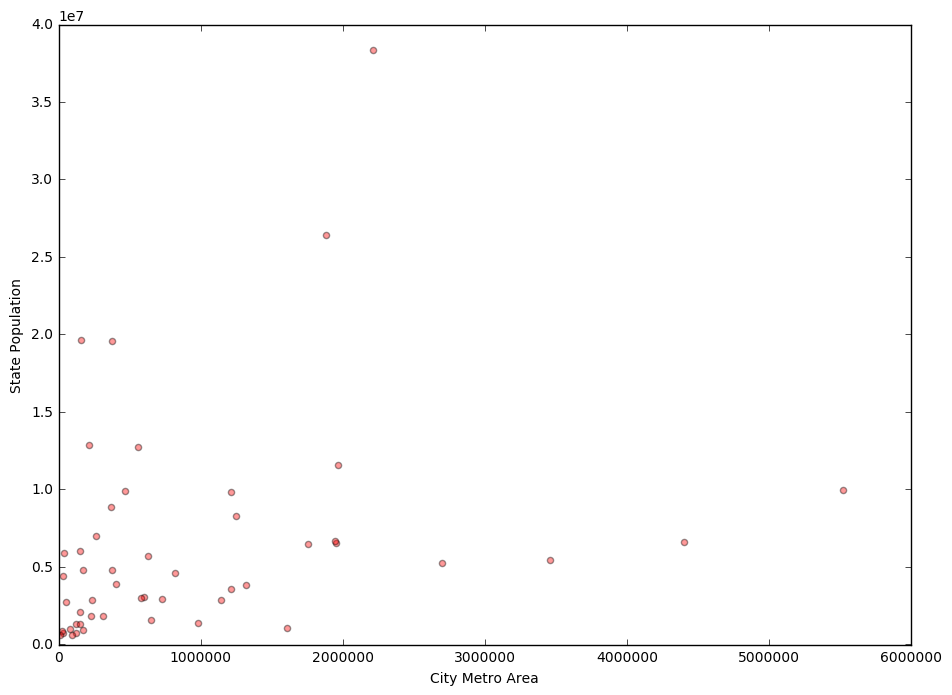

In [24]:
fig, ax = plt.subplots(figsize=(11,8))

plot1 = df.plot(ax=ax, #set equal to the correct axis. If not specified, will create new axis
                kind='scatter', #chart type
                x='City Metro Area', #specify your x-axis value
                y='State Population', #specify your y-axis value
                alpha=.4, #specify the transparency
                color='red', #specify the color
                xlim=(-300,6000000), #specify your x-axis limits
                ylim=(-300,40000000) #specify you y-axis limits
               )
plt.show()

#### With additional commands, you can customize the axes

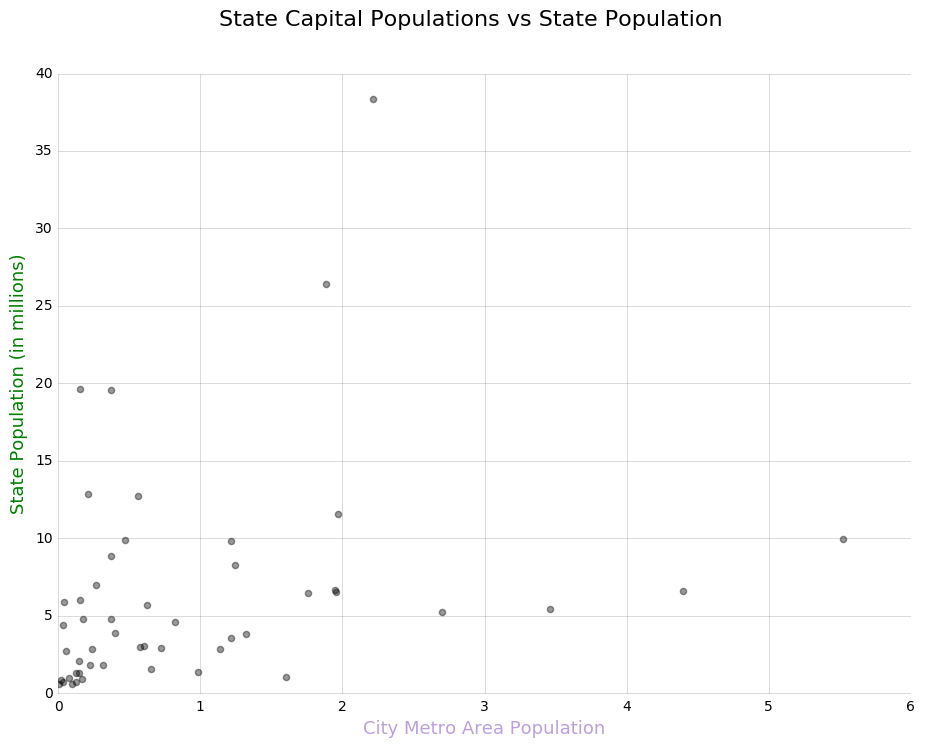

In [66]:
fig, ax = plt.subplots(figsize=(11,8))
fig.suptitle('State Capital Populations vs State Population',fontsize=16)
plot1 = df.plot(ax=ax, #set equal to the correct axis. If not specified, will create new axis
                kind='scatter', #chart type
                x='City Metro Area', #specify your x-axis value
                y='State Population', #specify your y-axis value
                alpha=.4, #specify the transparency
                color='black', #specify the color
                xlim=(-300,6000000), #specify your x-axis limits
                ylim=(-300,40000000) #specify you y-axis limits
               )

ax.grid(linestyle='-',alpha=.2)

for item in ax.spines.keys():
    ax.spines[item].set_visible(False)
    
ax.tick_params(axis='both', bottom='off',top='off',left='off',right='off')

ax.set_ylabel('State Population (in millions)',size=13,color='green')
ax.set_xlabel('City Metro Area Population',size=13,color='#bd9fdb')
x_ticks_labels = ax.set_xticklabels([int(x/1000000) for x in ax.get_xticks()])
y_ticks_labels_ = ax.set_yticklabels([int(x/1000000) for x in ax.get_yticks()])
#plt.show()

In [36]:
%matplotlib inline

In [21]:
plt.ax

### Additional chart examples

#### Horizontal Bar

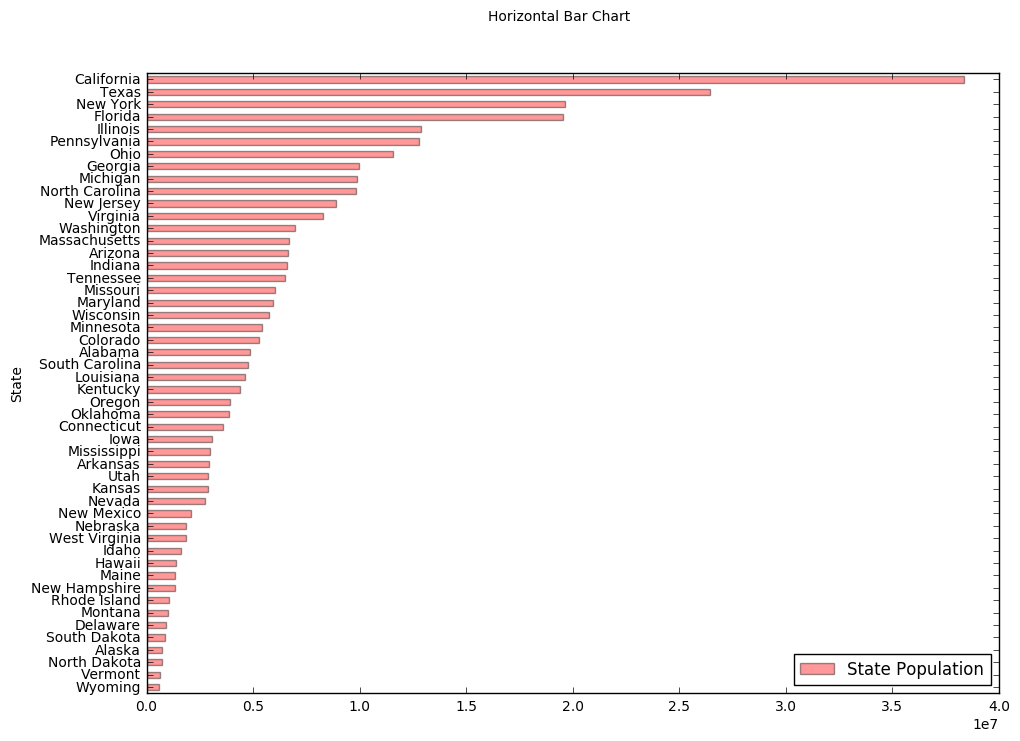

In [38]:
fig, ax = plt.subplots(figsize=(11,8))
fig.suptitle('Horizontal Bar Chart')
df.sort_values(by='State Population',inplace=True) #sort the axis by state population

df.plot(ax=ax,x='State',y='State Population',kind='barh',alpha=.4,
        color='red')

#### Area Chart

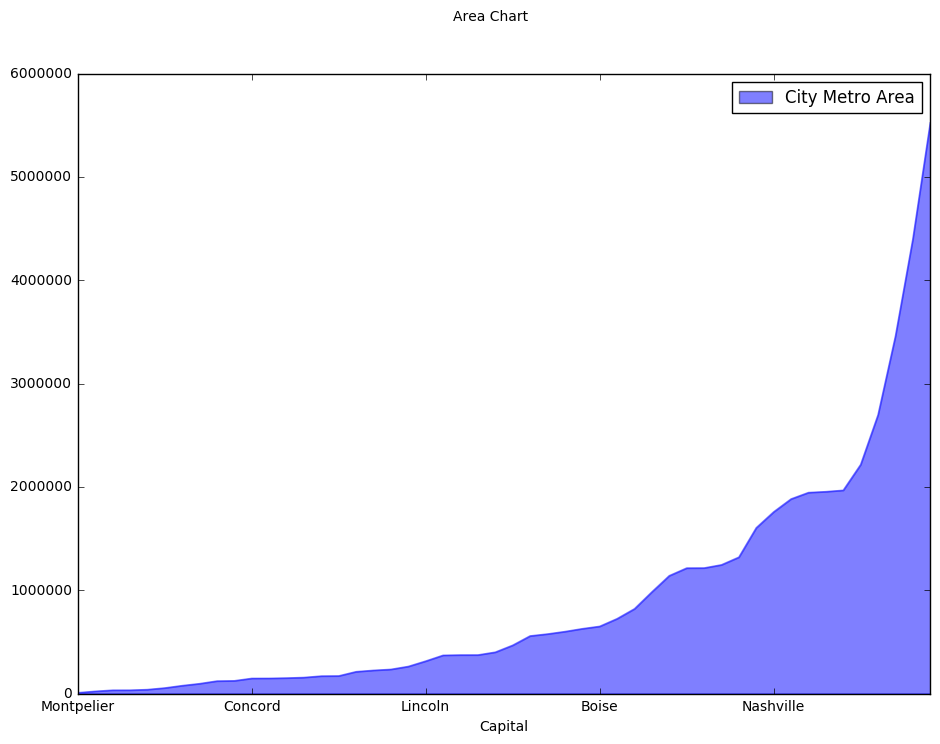

In [39]:
fig, ax = plt.subplots(figsize=(11,8))
fig.suptitle('Area Chart')
df.sort_values(by='City Metro Area',inplace=True)
df.plot(ax=ax,x='Capital',y='City Metro Area',kind='area',alpha=.5,sort_columns=True,
        color='Blue')

#### Density Chart

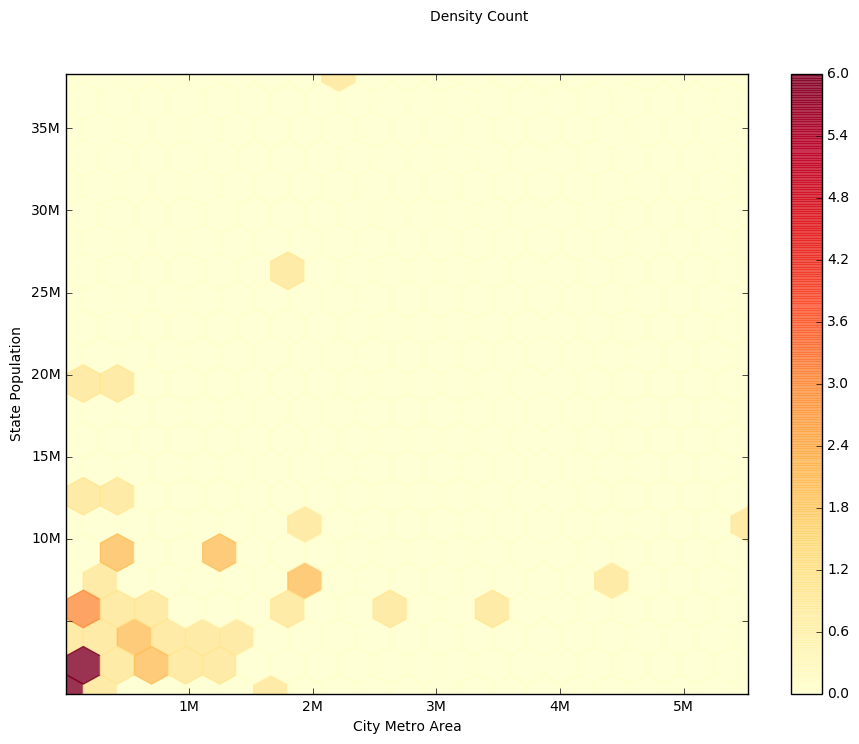

In [40]:
fig, ax = plt.subplots(figsize=(11,8))
fig.suptitle('Density Count')
df.plot(ax=ax,kind='hexbin',x='City Metro Area',
        y='State Population',alpha=.8,cmap='YlOrRd',gridsize=20)

x_ticklabels = ax.set_xticklabels([0,'1M','2M','3M','4M','5M'])
y_ticklabels = ax.set_yticklabels([0,'','10M','15M','20M','25M','30M','35M'])

#### Histogram

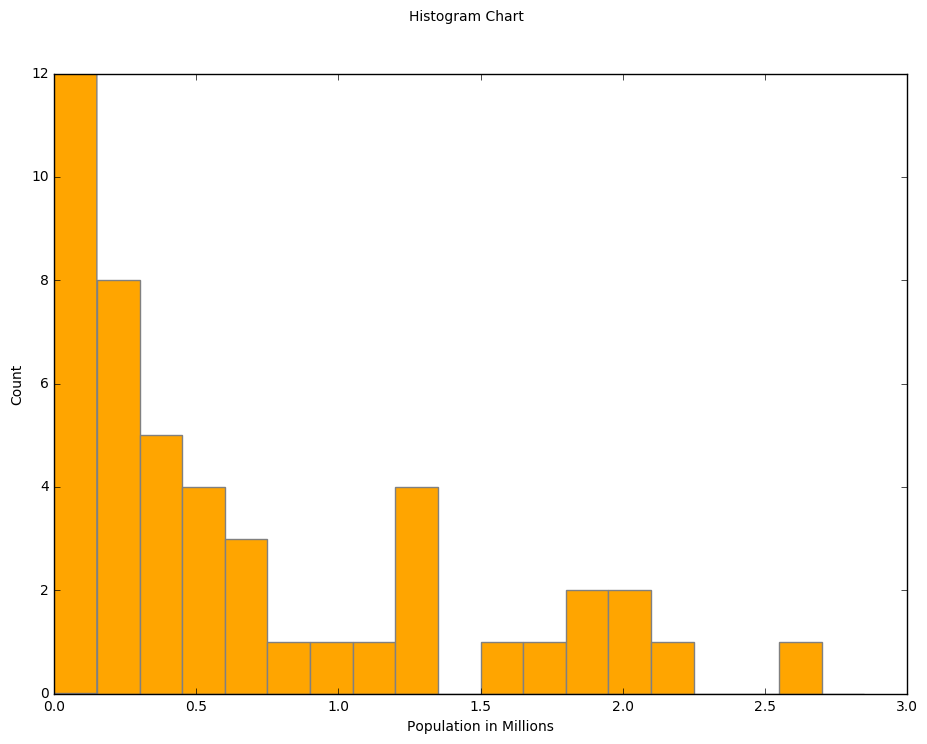

In [41]:
fig, ax = plt.subplots(figsize=(11,8))
fig.suptitle('Histogram Chart')

counts, bins, patches = plt.hist(x=df['City Metro Area'], #specify the cut-off values
                                 bins=[150000*x for x in range(20)],color='orange',edgecolor='grey') 
ax.set_xticklabels(ax.get_xticks()/1000000) #get the current labels and divides them by 1m
ax.set_xlabel('Population in Millions')
ax.set_ylabel('Count')

#### Bubble chart

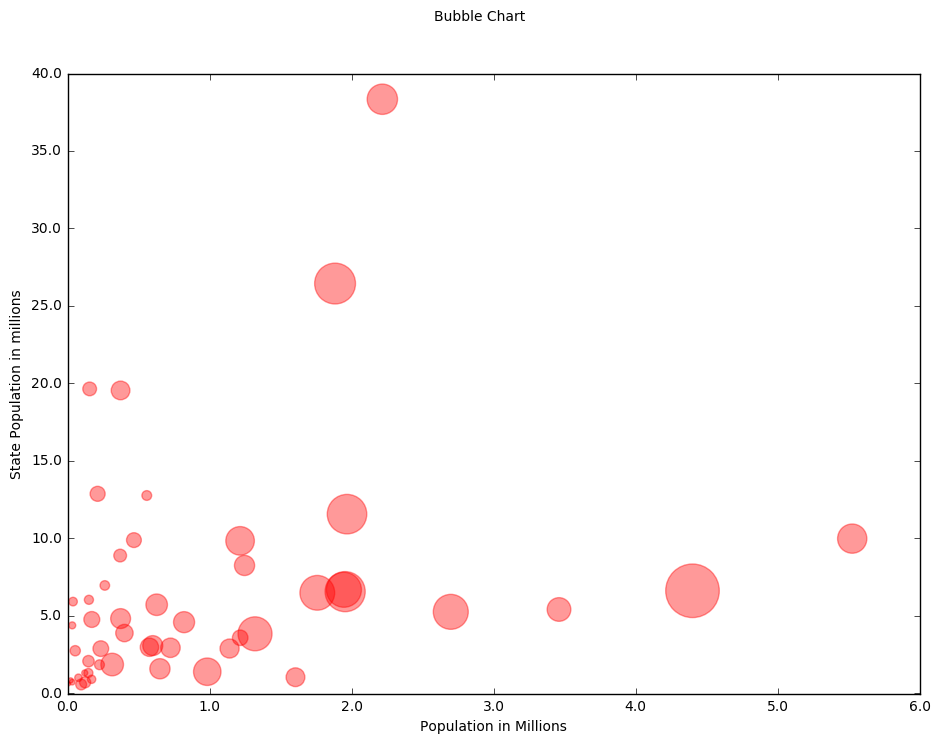

In [42]:
fig, ax = plt.subplots(figsize=(11,8))
fig.suptitle('Bubble Chart')


ax.set_xlim(-300,6000000) #specify your x-axis limits
ax.set_ylim(-300,40000000) #specify your y-axis limits
ax.set_xticklabels(ax.get_xticks()/1000000) 
ax.set_yticklabels(ax.get_yticks()/1000000)

plt.scatter(df['City Metro Area'],df['State Population'],s=df['City Population']/1000,alpha=.4,color='red')

ax.set_xlabel('Population in Millions')
ax.set_ylabel('State Population in millions')